1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy. (10 points)

In [232]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [233]:
df = pd.read_csv("vehicle.csv")

In [234]:
df.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [235]:
df.shape

(846, 19)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [237]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

1. #### Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [238]:
# finding Missing Values
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [239]:
#replacing the Missing values with mean values 
df.fillna(df.mean(), inplace=True)

In [240]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [241]:
#df.drop('class', inplace = True, axis = 1)

In [242]:
df2 = df.drop('class', axis = 1)

In [243]:
df2.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [244]:
df2 = np.log10(df2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [245]:
df2['class'] = df['class']

In [246]:
df2.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     1.977724     1.681241              1.919078      2.250420   
1     1.959041     1.612784              1.924279      2.149219   
2     2.017033     1.698970              2.025306      2.320146   
3     1.968483     1.612784              1.913814      2.201397   
4     1.929419     1.643453              1.845098      2.311754   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.857332                 1.000000       2.209515   
1              1.755875                 0.954243       2.173186   
2              1.819544                 1.000000       2.315970   
3              1.799341                 0.954243       2.158362   
4              2.012837                 1.716003       2.173186   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       1.623249                1.301030                   2.201397   
1       1.653213                1.278754                   2.155336   
2       1.505150                1.361728                   2.198657   
3       1.662758                1.278754                   2.155336   
4       1.653213                1.278754                   2.158362   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         2.245513           2.578639                   2.264818   
1         2.230449           2.518514                   2.198657   
2         2.348305           2.802774                   2.342423   
3         2.204120           2.489958                   2.103804   
4         2.382017           2.511883                   2.274158   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     1.845098        0.778151          1.204120   
1                     1.857332        0.954243          1.146128   
2                     1.863323        1.146128          0.954243   
3                     1.799341        0.778151          1.000000   
4                     2.103804        0.954243          1.041393   

   skewness_about.2  hollows_ratio class  
0          2.271842       2.294466   van  
1          2.276462       2.298853   van  
2          2.274158       2.292256   car  
3          2.298853       2.315970   van  
4          2.255273       2.262451   bus

circularity                          AxesSubplot(0.1,0.77069;0.173913x0.12931)
compactness                     AxesSubplot(0.308696,0.77069;0.173913x0.12931)
distance_circularity            AxesSubplot(0.517391,0.77069;0.173913x0.12931)
elongatedness                   AxesSubplot(0.726087,0.77069;0.173913x0.12931)
hollows_ratio                       AxesSubplot(0.1,0.615517;0.173913x0.12931)
max.length_aspect_ratio        AxesSubplot(0.308696,0.615517;0.173913x0.12931)
max.length_rectangularity      AxesSubplot(0.517391,0.615517;0.173913x0.12931)
pr.axis_aspect_ratio           AxesSubplot(0.726087,0.615517;0.173913x0.12931)
pr.axis_rectangularity              AxesSubplot(0.1,0.460345;0.173913x0.12931)
radius_ratio                   AxesSubplot(0.308696,0.460345;0.173913x0.12931)
scaled_radius_of_gyration      AxesSubplot(0.517391,0.460345;0.173913x0.12931)
scaled_radius_of_gyration.1    AxesSubplot(0.726087,0.460345;0.173913x0.12931)
scaled_variance                     AxesSubplot(0.1,

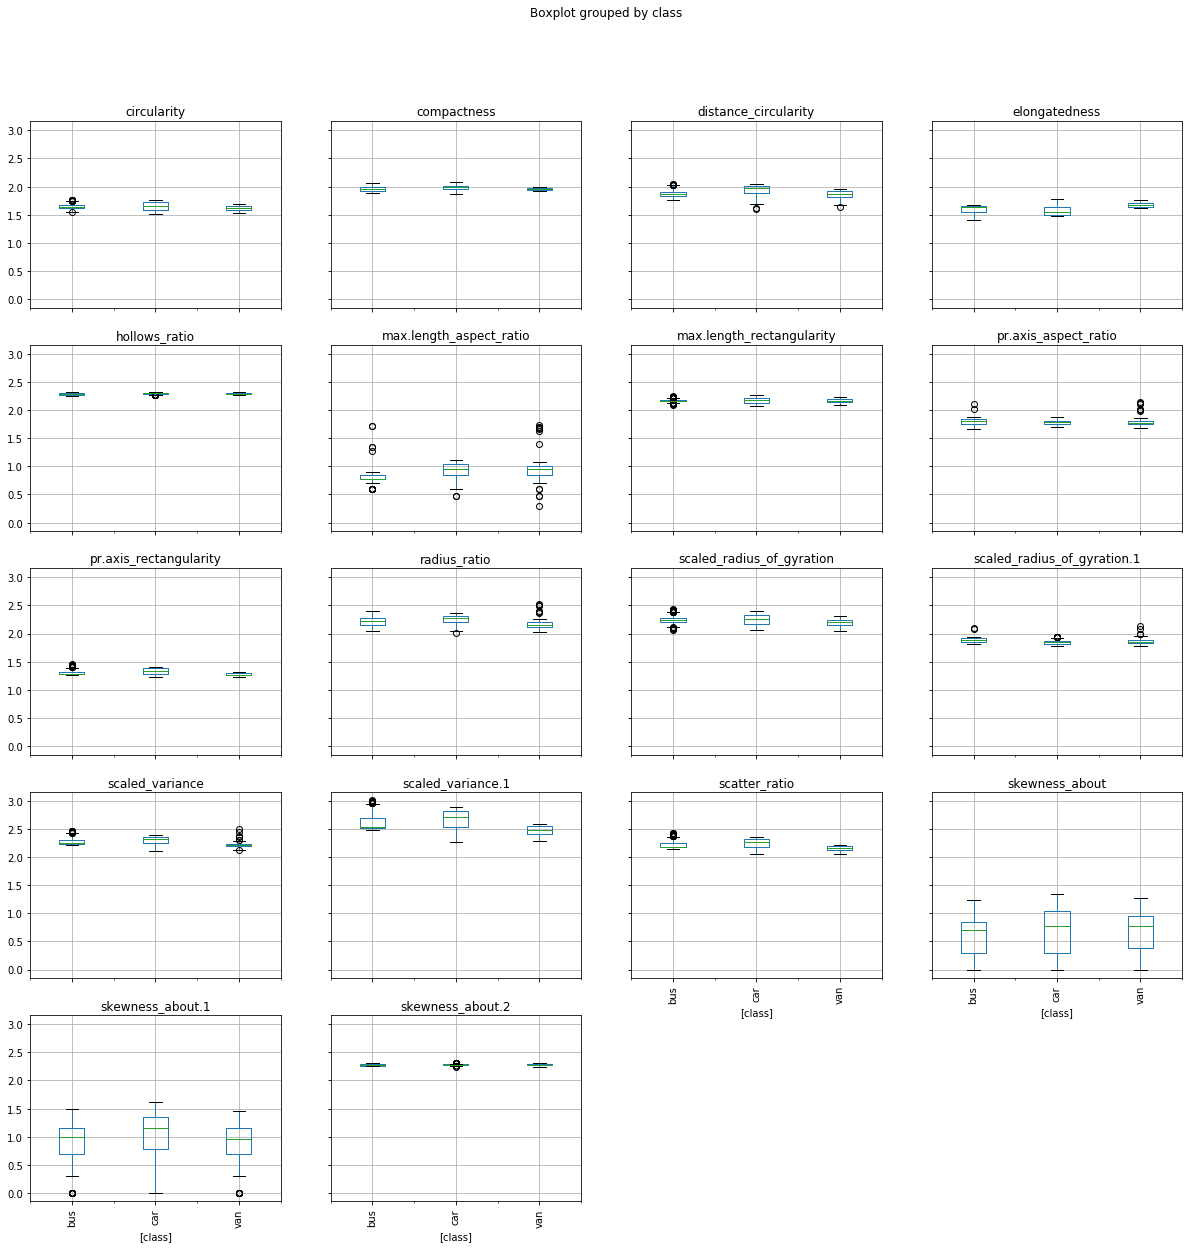

In [247]:
df2.boxplot(return_type='axes', figsize=(20,20), rot = 90, by = 'class')

#### As observed following few features have outliers among each class, but most features the oultiers are not very significant. the 'max.length_aspect_ratio' feture however has significant ouliters and can be treated.     

In [248]:
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3 - q1
mincap = q1-(1.5*iqr)
maxcap = q3+(1.5*iqr)
df1 = df[~((df.select_dtypes(exclude='object') < mincap) | (df.select_dtypes(exclude='object') >maxcap)).any(axis=1)]
print("No of observations in original dataset :" , df.shape[0])
print("No of observations after removing outliners :" , df1.shape[0])

No of observations in original dataset : 846
No of observations after removing outliners : 813


In [249]:
# Encoding class variable: 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df1['class'])

LabelEncoder()

In [250]:
df1['class'] = le.transform(df1['class'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [251]:
df1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95    48.000000                  83.0         178.0   
1           91    41.000000                  84.0         141.0   
2          104    50.000000                 106.0         209.0   
3           93    41.000000                  82.0         159.0   
5          107    44.828775                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
5                  50.0                        6          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
5           26.0                    28.0                        169   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
5             181.0            183      0

#### 2. Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [252]:
df1.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.679901              0.786810   
circularity                     0.679901     1.000000              0.787513   
distance_circularity            0.786810     0.787513              1.000000   
radius_ratio                    0.746091     0.641013              0.808392   
pr.axis_aspect_ratio            0.200887     0.205616              0.245423   
max.length_aspect_ratio         0.497660     0.563732              0.668662   
scatter_ratio                   0.810430     0.844049              0.904856   
elongatedness                  -0.788449    -0.816212             -0.908822   
pr.axis_rectangularity          0.811810     0.841827              0.894892   
max.length_rectangularity       0.674166     0.961873              0.768843   
scaled_variance                 0.792230     0.803324              0.884633   
scaled_variance.1               0.814537     0.835218              0.889593   
scaled_radius_of_gyration       0.577596     0.926273              0.702683   
scaled_radius_of_gyration.1    -0.254274     0.067633             -0.237766   
skewness_about                  0.200199     0.140639              0.098711   
skewness_about.1                0.161505    -0.014774              0.263514   
skewness_about.2                0.295404    -0.118122              0.128336   
hollows_ratio                   0.364160     0.038081              0.320969   
class                          -0.028066    -0.151426             -0.058983   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.746091              0.200887   
circularity                      0.641013              0.205616   
distance_circularity             0.808392              0.245423   
radius_ratio                     1.000000              0.666403   
pr.axis_aspect_ratio             0.666403              1.000000   
max.length_aspect_ratio          0.460737              0.138243   
scatter_ratio                    0.789305              0.199988   
elongatedness                   -0.844374             -0.302280   
pr.axis_rectangularity           0.763736              0.169522   
max.length_rectangularity        0.577067              0.146175   
scaled_variance                  0.793528              0.215642   
scaled_variance.1                0.778087              0.187041   
scaled_radius_of_gyration        0.550726              0.153722   
scaled_radius_of_gyration.1     -0.403672             -0.325331   
skewness_about                   0.040348             -0.051643   
skewness_about.1                 0.187295             -0.028793   
skewness_about.2                 0.418257              0.406247   
hollows_ratio                    0.504630              0.419789   
class                           -0.225840             -0.216783   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.497660       0.810430   
circularity                                 0.563732       0.844049   
distance_circularity                        0.668662       0.904856   
radius_ratio                                0.460737       0.789305   
pr.axis_aspect_ratio                        0.138243       0.199988   
max.length_aspect_ratio                     1.000000       0.497043   
scatter_ratio                               0.497043       1.000000   
elongatedness                              -0.502220      -0.971404   
pr.axis_rectangularity                      0.497641       0.989034   
max.length_rectangularity                   0.647844       0.806303   
scaled_variance                             0.411749       0.977143   
scaled_variance.1                           0.459248       0.993807   
scaled_radius_of_gyration                   0.404216       0.794274   
scaled_radius_of_gyration.1                -0.333074       0.001917   
skewness_about                            

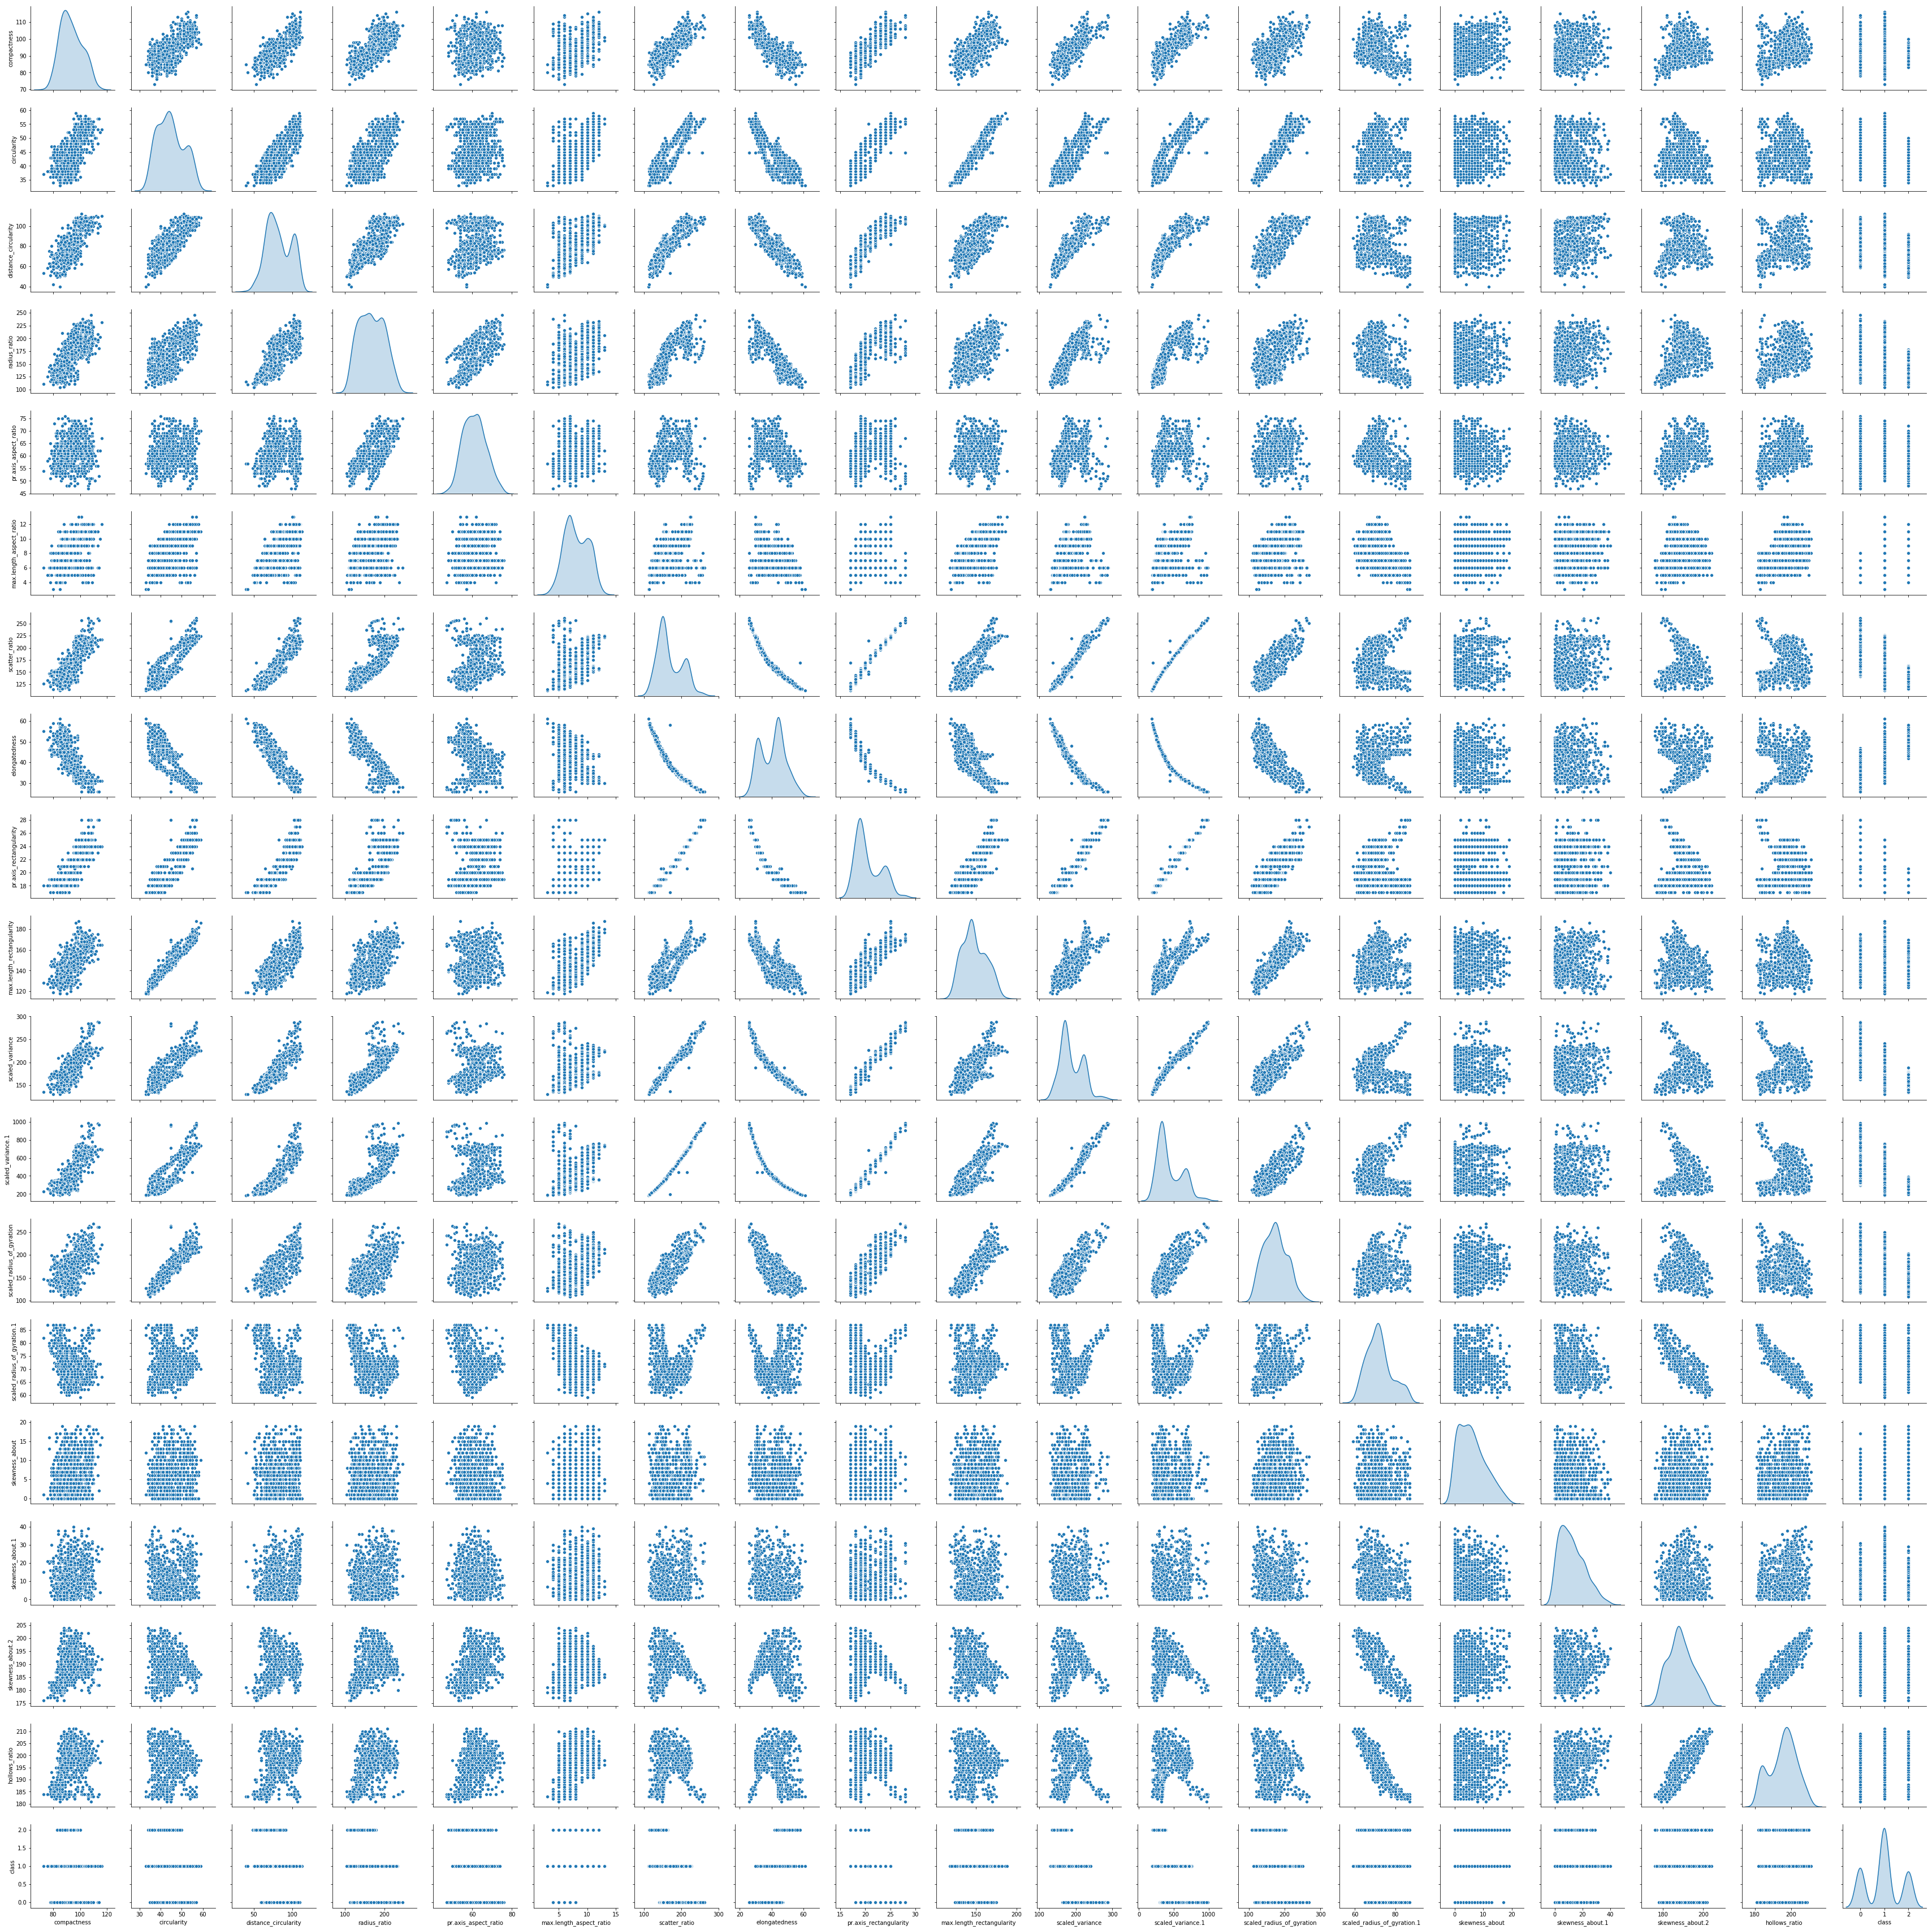

In [253]:
sns.pairplot(df1, diag_kind = 'kde')

We can observe that there is high correlation between some of the features and also there is a linear relationship between multiple features. The same can be eliminated using PCA 

Also observing the dist graph we can clearly see most features distinguish 2 classes

#### 3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [254]:
y = df1['class']
x = df1.drop('class', axis = 1)

In [255]:
#df1.drop('class', axis =1, inplace = True)

In [256]:
# normalizing the Data 
from scipy.stats import zscore
x = x.apply(zscore)

In [257]:
x.shape

(813, 18)

In [258]:
from sklearn.decomposition import PCA

In [259]:
cov_matrix = np.cov(x.T)
#print("Covariance Matrix is: \n", cov_matrix)

In [260]:
eival, eivec = np.linalg.eig(cov_matrix)

In [261]:
# Building an Array of Eigen Vectors and Values

eig_pair = [(eival[index], eivec[:, index]) for index in range (len(eival))]

In [262]:
eig_pair.sort()
eig_pair.reverse()

In [263]:
eivalsorted = [eig_pair[index][0] for index in range(len(eival))]

In [264]:
eivecsorted = [eig_pair[index][1] for index in range(len(eival))]

In [265]:
tot = sum(eival)
tot

18.022167487684715

In [266]:
var_explained = [(i/tot)*100 for i in sorted(eival, reverse = True)]
cum_var = np.cumsum(var_explained)
cum_var

array([ 54.36109244,  73.10682316,  79.81561088,  86.12288219,
        91.09408821,  94.74422659,  96.53426834,  97.79137464,
        98.41325604,  98.83526262,  99.17921189,  99.4195499 ,
        99.58305228,  99.72948548,  99.83643991,  99.93048996,
        99.98224832, 100.        ])

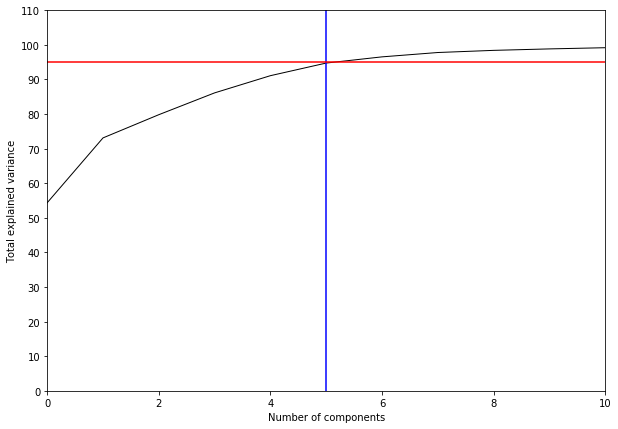

In [267]:
plt.figure(figsize=(10,7))

plt.plot(cum_var, color='k', lw=1)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 10,1)
plt.yticks(np.arange(0, 120, 10))

plt.axvline(5, c='b')
plt.axhline(95, c='r')

plt.show()

We can take 5 components to explain 95% of variance

In [268]:
pca = PCA(n_components=5)
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [269]:
X_pca = pca.transform(df1)

In [270]:
X_pca.shape

(813, 5)

In [271]:
pca.explained_variance_

array([33934.28341127,   568.85849316,   365.78764372,    85.89851432,
          69.01968542])

In [272]:
pca.explained_variance_ratio_

array([0.96461599, 0.01617037, 0.01039788, 0.00244175, 0.00196195])

In [273]:
PCA_Comp = pd.DataFrame(X_pca)

#### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy. (10 points)

In [274]:
x = PCA_Comp

In [275]:
y.shape

(813,)

In [276]:
x.shape

(813, 5)

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)

In [278]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [279]:
classifier = SVC()

In [280]:
from sklearn.model_selection import GridSearchCV

In [281]:
params = {'C':[0.01, 0.05, 0.5, 1], 'kernel':['linear', 'rbf']}

In [282]:
model1 = GridSearchCV(classifier, param_grid=params, n_jobs=-1)

In [283]:
model1.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [284]:
prediction=model1.predict(X_test)


In [285]:
print("Best Hyper Parameters:",model1.best_params_)

Best Hyper Parameters: {'C': 1, 'kernel': 'rbf'}


In [286]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [287]:
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.901840490797546


In [288]:
from sklearn.model_selection import cross_val_score

In [290]:
scores = cross_val_score(model1, x, y, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

In [291]:
scores

array([0.76219512, 0.75460123, 0.81595092, 0.79012346, 0.80745342])

In [292]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.05)
